In [50]:
import os
import pathlib
import warnings
import glob as gl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import log as ln
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')

In [51]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 10})

In [52]:
# sub_MR2 = pd.read_csv('/Users/alduck/Documents/PhDStuff_repo/PasiveTestingUsingMTplusFuzzTesting/individual_logs/FinalLogSub_MR2.csv', index_col= 0)
sub_MR2 = pd.read_csv('/Users/alduck/Documents/PhDStuff_repo/PasiveTestingUsingMTplusFuzzTesting/individual_logs/FinalLogSub_MR3.csv', index_col= 0)

In [53]:
sub_MR2.keys()

Index(['(a,b)', 'input_a', 'input_b', 'operand', 'const', 'output',
       'MR3_input_a', 'MR3_input_b', 'MR3_inputs', 'MR3_output',
       'MR3_checker'],
      dtype='object')

In [54]:
data = sub_MR2.drop(['(a,b)', 'operand', 'MR3_checker', 'MR3_inputs'], axis=1)

In [55]:
data.keys()

Index(['input_a', 'input_b', 'const', 'output', 'MR3_input_a', 'MR3_input_b',
       'MR3_output'],
      dtype='object')

In [56]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA()
pca.fit(segmentation_std)

PCA()

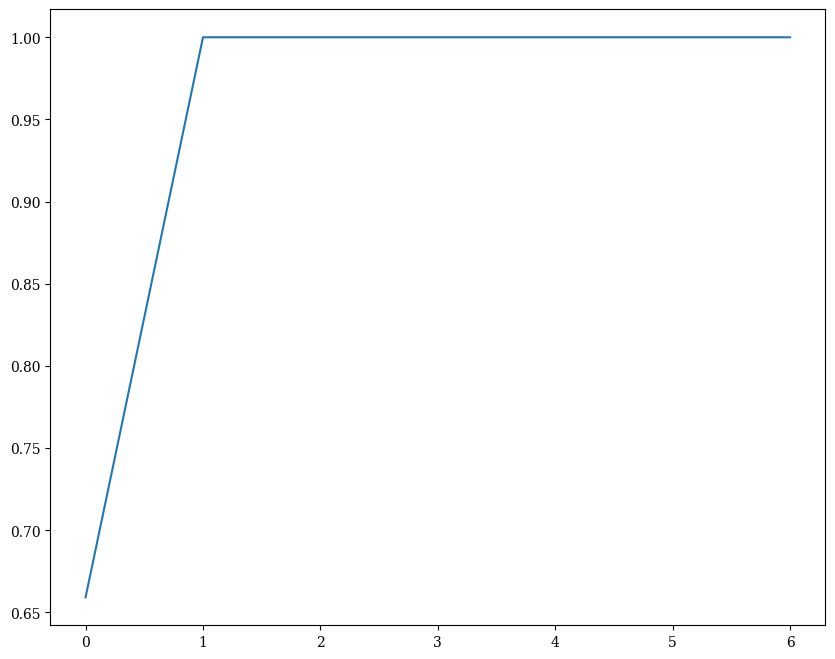

In [57]:

plt.figure(figsize= (10,8))
plt.plot(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum())

In [58]:
scores_pca = pca.transform(segmentation_std)

In [59]:
kmeans_PCA_K5 = KMeans(n_clusters= 2, init= 'k-means++', random_state=42)
kmeans_PCA_K5.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [60]:
df_segm_pcs_kmeans5 = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pcs_kmeans5.columns.values[-2:]=['Component 1', 'Component 2']
df_segm_pcs_kmeans5['KMeans'] = kmeans_PCA_K5.labels_
df_segm_pcs_kmeans5['segment'] = df_segm_pcs_kmeans5['KMeans'].map({0:'first', 1: 'seconds'})

<AxesSubplot:xlabel='Component 2', ylabel='Component 1'>

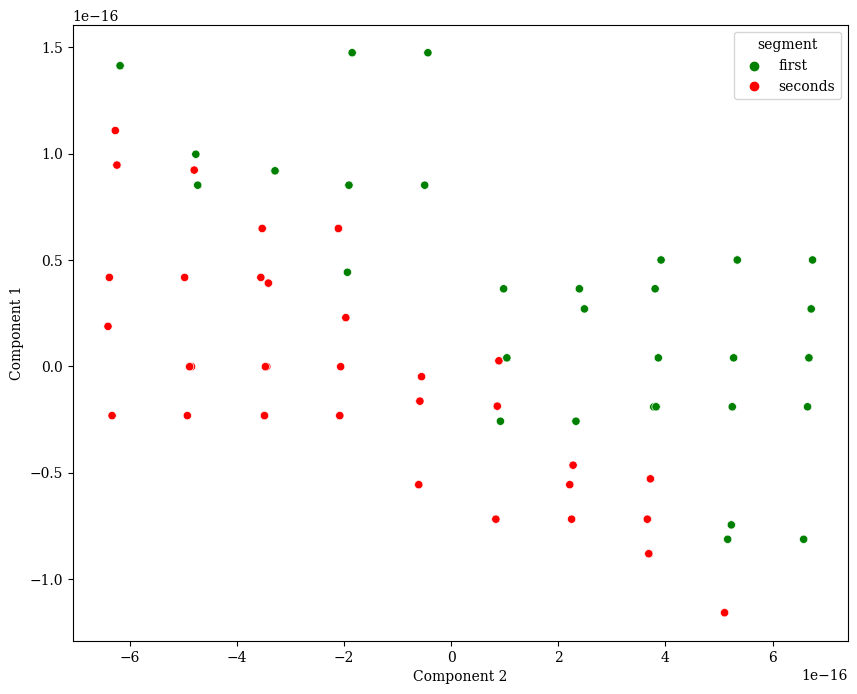

In [61]:
x_axis = df_segm_pcs_kmeans5['Component 2']
y_axis = df_segm_pcs_kmeans5['Component 1']
plt.figure(figsize=(10, 8))
sns.scatterplot(data = df_segm_pcs_kmeans5, x = x_axis, y = y_axis, hue = df_segm_pcs_kmeans5['segment'], palette=['g','r','c','m', 'y'])

In [62]:
df_segm_pcs_kmeans5.to_csv('kmeans_k2_PCA_MR3.csv')

In [63]:
df_segm_pcs_kmeans5_full = pd.concat([sub_MR2.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pcs_kmeans5_full['KMeans'] = kmeans_PCA_K5.labels_
df_segm_pcs_kmeans5_full['segment'] = df_segm_pcs_kmeans5['KMeans'].map({0:'first', 1: 'seconds'})

In [64]:
df_segm_pcs_kmeans5_full.to_csv('kmeans_k2_PCA_full_MR3.csv')